# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [14]:
import pandas as pd

data = pd.read_csv('clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

#### Normalize the numeric features, Get two principal components

In [3]:
# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:2]]
features.sample(10)

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:2]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.3145124 , -0.05531718],
       [ 0.53766685, -0.05993373],
       [-0.19870478,  0.08589647],
       [-0.27609658,  0.11711494],
       [ 0.32757379, -0.16128549],
       [ 0.33697255, -0.06158248],
       [-0.50821462,  0.07102105],
       [-0.1805265 ,  0.10489307],
       [ 0.43967541,  0.13737133],
       [ 0.43271121,  0.01963967]])

#### Visualise in a plot

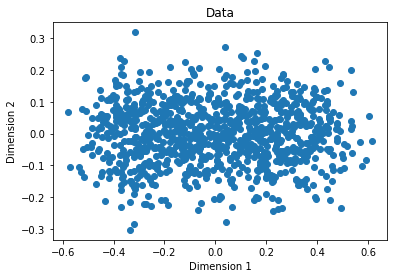

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

#### Calculate WCSS to determine the right number of clusters

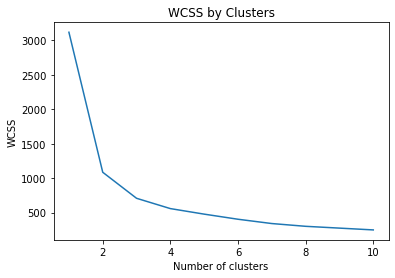

In [5]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### K-Means

In [ ]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=4, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters

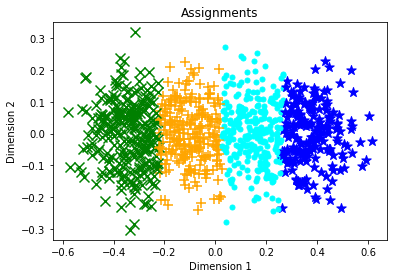

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange',3:'cyan'}
    mrk_dic = {0:'*',1:'x',2:'+',3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

#### Agglomerative clustering

In [8]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_model.fit_predict(features.values)
agg_clusters

array([3, 3, 2, 1, 3, 3, 1, 2, 3, 3, 1, 2, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2,
       0, 0, 2, 0, 1, 3, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 3, 0, 2, 2, 1, 0,
       1, 3, 3, 1, 1, 2, 3, 0, 2, 1, 1, 1, 2, 0, 2, 3, 3, 0, 3, 3, 2, 2,
       0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 0, 1, 2, 2, 1, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 0, 1,
       2, 0, 0, 3, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 3, 2, 0, 2, 1, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 2, 0, 3, 0, 0, 3, 1, 1, 2, 1, 2, 2, 1, 3, 0, 2,
       3, 0, 0, 2, 2, 2, 0, 3, 1, 1, 2, 0, 0, 3, 3, 1, 3, 0, 0, 1, 2, 3,
       0, 2, 0, 3, 1, 3, 2, 0, 0, 1, 3, 2, 1, 2, 0, 3, 0, 0, 1, 0, 2, 2,
       3, 1, 0, 1, 1, 1, 0, 3, 2, 2, 1, 0, 2, 2, 0, 3, 1, 2, 2, 1, 0, 1,
       2, 3, 3, 1, 0, 2, 0, 3, 2, 0, 2, 3, 0, 2, 3, 1, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 3, 0, 2, 1, 2, 0, 0, 1, 1, 1, 3, 2, 3, 2, 1, 2, 2,
       0, 2, 0, 0, 0, 2, 1, 3, 2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 3, 3, 2,
       1, 0, 1, 3, 3, 0, 3, 2, 2, 1, 0, 2, 0, 3, 2,

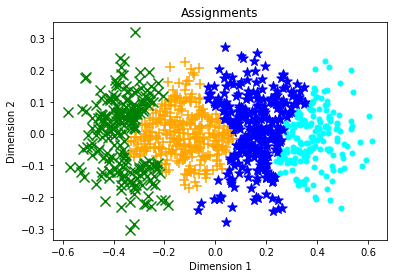

In [13]:
plot_clusters(features_2d, agg_clusters)